# Espectro plano acotado

[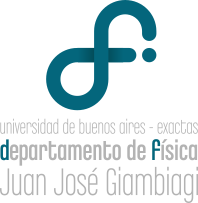](https://www.df.uba.ar/)  

[cc-by-sa-80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Transformada de Fourier
>Referencia:  
Secciones 1.5 y 1.6  
Stephen Nettel. Wave Physics. 4th ed. Berlin, Heidelberg: Springer Berlin Heidelberg, 2009.

- **Transformada** ($\mathcal{F}$): Operación sobre $f(x)$
$$
\mathcal{F} f(x) = \hat{f}(\xi) = \int_{-\infty}^{\infty} f(x)\ \operatorname{e}^{-2\pi i x \xi}\,\mathrm{d} x
$$
que la descompone en la contribución de cada frecuencia $\xi$.
$\hat{f}(\xi)$ es la representación en el dominio de la frecuencia de $f(x)$.

- **Anti-transformada** ($\mathcal{F}^{-1}$): Operación inversa que recupera una representación en el dominio de las $x$
$$
f(x) = \mathcal{F}^{-1} \hat{f}(\xi) = \int_{-\infty}^{\infty} \hat{f}(\xi)\ \operatorname{e}^{+2 \pi i x \xi}\,\mathrm{d} \xi
$$

- **Tiempo ($t$) y frecuencia angular ($\omega$)**: Cuando se descompone una función del tiempo $f(t)$, $\xi$ corresponde a $\nu$ y se suele hacer uso del cambio de variable $\omega = 2 \pi \nu$
$$
\mathcal{F} f(t) = \hat{f}(\omega) = \hat{f}(\frac{\omega}{2 \pi}) = \int_{-\infty}^{\infty} f(t) \operatorname{e}^{-i \omega t}\,\mathrm{d} t
$$
y la inversa
$$
f(t) = \mathcal{F}^{-1} \hat{f}(\omega) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \hat{f}(\omega) \operatorname{e}^{+i \omega t}\,\mathrm{d} \omega,
$$
donde no hay que olvidar el factor $\frac{1}{2 \pi}$ pues no se integró en $\nu$ sino en $\omega$.  
Este factor causa una asimetría entre la transformada y su inversa, que suele salvarse aplicando un factor $\frac{1}{\sqrt{2 \pi}}$ tanto en $\mathcal{F}^{-1}$ como en $\mathcal{F}$ para hacer de esta una operación unitaria. 
$$
\boxed{
\hat{f}(\omega) = \mathcal{F} f(t) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(t) \operatorname{e}^{-i \omega t}\,\mathrm{d} t
} \\
\boxed{
f(t) = \mathcal{F}^{-1} \hat{f}(\omega) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \hat{f}(\omega) \operatorname{e}^{+i \omega t}\,\mathrm{d} \omega
}.
$$

- **Espectro** Las amplitudes en función de $\omega$ que hay en $f(t)$. Usualmente solo se representa $\left| \hat{f}(\omega) \right|$ pues $\hat{f}(\omega) \in \mathbb{C}$.
- **Posición ($r$) y número de onda ($k$)**
Ídem. $t$ y $\omega$
$$
\boxed{
\hat{f}(k) = \mathcal{F} f(r) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(x) \operatorname{e}^{-i k r}\,\mathrm{d} x
} \\
\boxed{
f(r) = \mathcal{F}^{-1} \hat{f}(k) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \hat{f}(k) \operatorname{e}^{+i k r}\,\mathrm{d} k
}.
$$

- **Primitivas útiles**
$$
\int_{-\infty}^{\infty} f(x)\ \operatorname{e}^{-a x^2}\, \mathrm{d} x = \sqrt{ \frac{ \pi }{ a  } }
\qquad 
\int_{-\infty}^{\infty} f(x)\ \cos{(k x)} \operatorname{e}^{-a x^2}\, \mathrm{d} x = \sqrt{ \frac{ \pi }{ a  } } \operatorname{e}^{-\frac{k^2}{4 a}}
\qquad 
\int_{-\infty}^{\infty} f(x)\ \sin{(k x)} \operatorname{e}^{-a x^2}\, \mathrm{d} x = 0
$$

## Enunciado
En un intervalo de frecuencias $\Delta\omega$ centrado en $\omega_0$ el espectro es constante con un valor $\frac{1}{\Delta \omega}$, y es cero en cualquier otra $\omega$.

a) Verifique que $\phi(t)$ está dada por:
$$
\phi(t) = \frac{1}{\sqrt{2 \pi}} \left[ \frac{ \sin{ \left( \frac{\Delta \omega}{2} t \right) } }{\frac{\Delta \omega}{2} t} \right] \operatorname{e}^{i \omega_0 t}.
$$  
b) Grafique $\Psi(\omega)$ y $\left|\phi(t)\right|$.  
c) Sea $T$ un tiempo más prolongado que la duración de cualquier experimento que pueda idear.
Muestre que si $\Delta\omega$ es suficientemente pequeño como para que $\Delta\omega T\ll1$, entonces durante un tiempo menor que $T$, $\phi(t)$ es una función armónica de amplitud y fase casi constante.

## Verificar transformada 
Hay un rango en que espectro $\Psi(\omega)$ presenta la misma amplitud
$$
\Psi(\omega) =
\begin{cases}
  0 &  \omega > \omega_0 - \frac{\Delta \omega}{2}\\
  \frac{1}{\Delta \omega} &  \omega_0 - \frac{\Delta \omega}{2} \leq \omega \leq \omega_0 - \frac{\Delta \omega}{2}\\
  0 &  \omega > \omega_0 + \frac{\Delta \omega}{2}\\
\end{cases},
$$
la inversa del ancho espectral de esta señal $\Delta \omega$.

Lo primero que se nos pide es que verifiquemos el resultado de aplicar lo que sería la anti-transformada de Fourier para recuperar la expresión de esta en función del tiempo
$$
\begin{aligned}
\phi(t) 
& = \mathcal{F}^{-1} \Psi(\omega) 
= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \Psi(\omega) \operatorname{e}^{i \omega t} \,\mathrm{d} \omega \\
& = \frac{1}{\sqrt{2 \pi}} \int_{\omega_0 -\frac{\Delta \omega}{2}}^{\omega_0 -\frac{\Delta \omega}{2}} \frac{1}{\Delta \omega} \operatorname{e}^{i \omega t} \,\mathrm{d} \omega \\
& = \frac{1}{\sqrt{2 \pi} \Delta \omega} \int_{\omega_0 -\frac{\Delta \omega}{2}}^{\omega_0 + \frac{\Delta \omega}{2}} \operatorname{e}^{i \omega t} \,\mathrm{d} \omega \\
& = \frac{1}{\sqrt{2 \pi} \Delta \omega} \left[ \frac{\operatorname{e}^{i \omega t} }{i t} \right]_{\omega = \omega_0 -\frac{\Delta \omega}{2}}^{\omega = \omega_0 + \frac{\Delta \omega}{2}} \\
& = \frac{1}{\sqrt{2 \pi} ( i \Delta \omega t )} \left[ \operatorname{e}^{i (\omega_0 + \frac{\Delta \omega}{2}) t} - \operatorname{e}^{i (\omega_0 -\frac{\Delta \omega}{2}) t} \right] \\
& = \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{1}{ i \Delta \omega t} \left[ \operatorname{e}^{i \frac{\Delta \omega}{2} t} - \operatorname{e}^{- i \frac{\Delta \omega}{2} t} \right] \\
& = \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{1}{2} \left[ \frac{ \left( \cos( \frac{\Delta \omega}{2} t ) + i \sin( \frac{\Delta \omega}{2} t ) \right) - \left( \cos( \frac{\Delta \omega}{2} t ) - i \sin( \frac{\Delta \omega}{2} t ) \right) }{ i \frac{\Delta \omega}{2} t} \right] \\
& = \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{1}{2} \left[ \frac{ 2 i \sin( \frac{\Delta \omega}{2} t ) }{ i \frac{\Delta \omega}{2} t} \right]
= \boxed{
   \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{ \sin( \frac{\Delta \omega}{2} t ) }{ \frac{\Delta \omega}{2} t }
}.
\end{aligned}
$$
Con lo que cumplimos con lo pedido en el punto a) del problema, pero para entender mejor de que se trata este resultado y su relación con $\Psi(\omega)$ hay que graficar ambas.

## Graficación

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
# mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
[omega, omega0, t, Domega, phi, Psi] = sym.symbols('omega omega_0 t \Delta\omega phi Psi')

Para mostrar como es un espectro plano $\Psi(\omega)$ elijo una frecuencia central $\omega_0$ y un ancho espectral $\Delta \omega$ arbitarios tales que $\omega_0 > \Delta \omega$.

Para definir el ancho espectral $\Delta \omega$ se hace uso de la función de Heaviside
$$
\theta(x-x_0) =
\begin{cases}
1 & x \geq x_0 \\
0 & x < x_0
\end{cases}
$$

In [3]:
Psi_expresion= 1/Domega* (
    + sym.Heaviside( omega - ( omega0 - Domega/2 ) )
    - sym.Heaviside( omega - ( omega0 + Domega/2 ) ) 
    )
sym.Eq(Psi, Psi_expresion, evaluate=False)

Eq(Psi, (-Heaviside(-\Delta\omega/2 + omega - omega_0) + Heaviside(\Delta\omega/2 + omega - omega_0))/\Delta\omega)

Para graficarla elijo unos valores arbitrarios.

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

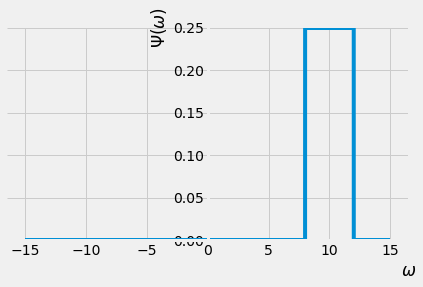

In [5]:
omega0_v = 10 # [s-1]
Domega_v = 4 # [s-1]
Psi_expresion_v= Psi_expresion.subs([(Domega, Domega_v),(omega0, omega0_v)])  # uso valores numéricos
sym.plot(Psi_expresion_v,(omega,-1.5*omega0_v,1.5*omega0_v),xlabel='$\omega$', ylabel='$\Psi(\omega)$', ylim=(0,1/Domega_v))

Me planteo graficar $\phi(t)$.
Como la función $\frac{\sin(x)}{x}$ se suele resumir como sinc(x).

In [6]:
phi_expresion= (1/ sym.sqrt(2* sym.pi) )* sym.exp( sym.I * omega0* t)* sym.sinc(Domega* t/2)
sym.Eq(phi, phi_expresion, evaluate=False)

Eq(phi, sqrt(2)*exp(I*omega_0*t)*sinc(\Delta\omega*t/2)/(2*sqrt(pi)))

Recordemos que como surge de $\mathcal{F}^{-1} \Psi(\omega)$ esto hace que $\phi(t) \in \mathbb{C}$.
Lo observable es el valor absoluto $\left| \phi(t) \right|$ por tanto la gráfica responderá a la forma de $\textrm{sinc}\left(\frac{\Delta \omega t}{2}\right)$.

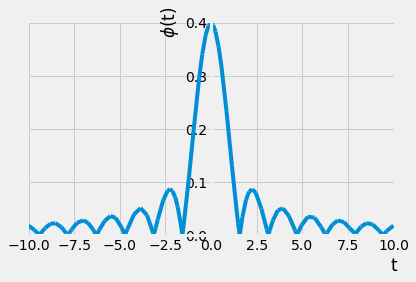

In [7]:
phi_expresion_v = phi_expresion.subs([(Domega, Domega_v),(omega0, omega0_v)])  # uso valores numéricos
phi_expresion_v = sym.Abs(phi_expresion_v) # valor absoluto
sym.plot(phi_expresion_v, xlim=(-10,10), ylim=(0,0.4), ylabel='$\phi$(t)')

Hay cosas remarcables a ver
- La **amplitud** pico es el área del espectro plano, $\frac{1}{\Delta \omega} \times \Delta\omega$, afectada por el factor $\frac{1}{\sqrt{2 \pi} }$.
- Los ceros que limitan la **duración** del lóbulo principal del _sinc_ son los ceros del _sen_ y están dados por $\frac{\Delta \omega}{2} t_0 = \pm \pi \implies t_0 = \pm \frac{2 \pi}{\Delta \omega}$

## Relación $\Delta \omega$ y $T$
Si el rango de tiempo contemplado es muy grande $T \gg 1$ y $\Delta \omega T \ll 1 \implies \Delta \omega \ll 1$, esencialmente el espectro tiende a mostrar un único pico en una $\omega_0$, que como función serepresenta por una delta de dirac modulada por su correspondiente amplitud
$$
\Psi(\omega) = A_{\omega_0} \delta(\omega_0).
$$
Sabemos que la $\phi(t)= \mathcal{F}^{-1} \Psi(\omega)$ debe ser una única función armónica de esta $\omega_0$ y amplitud $\propto A_{\omega_0}$.

Podemos probar esto analizando en el límite de $\Delta \omega \rightarrow 0$ la expresión de $\phi(t)$ que comprobamos anteriormente
$$
\lim_{\Delta \omega \to 0} \phi(t)
= \lim_{\Delta \omega \to 0} \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{ \sin( \frac{\Delta \omega}{2} t ) }{ \frac{\Delta \omega}{2} t }
\stackrel{\text{L'H}}{=} \lim_{\Delta \omega \to 0} \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{\Delta \omega}{2} \frac{ \cos( \frac{\Delta \omega}{2} t ) }{ \frac{\Delta \omega}{2}}
= \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} },
$$
que gracias a la regla de L' Hôpital $\stackrel{\text{L'H}}{=}$ vemos que representa una armónica de frecuencia $\omega_0$.